In [1]:
import numpy as np
import cv2 as cv
import os
from matplotlib import pyplot as plt
import skimage
import scipy
%matplotlib inline

In [2]:
img_dataset_path = "/home/devesh/cell-segmentation/images/"
img_names = os.listdir(img_dataset_path)
img_names.sort()
img_names.remove('.DS_Store')
img_names.remove('.ipynb_checkpoints')

In [24]:
#Helper Functions
def bgr2rgb(img):
    new_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    return new_img

def bgr2hsv(img):
    new_img = cv.cvtColor(img,cv.COLOR_BGR2HSV)
    return new_img

def hsv2bgr(img):
    new_img = cv.cvtColor(img,cv.COLOR_HSV2BGR)
    return new_img

def rgb2bgr(img):
    new_img = cv.cvtColor(img,cv.COLOR_RGB2BGR)
    return new_img
    
#def holeClose(img,kernel,iterations)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
 
def dilate(img,kernel_mat,iter_num):
    new_img = cv.dilate(img,kernel=kernel_mat,iterations=iter_num)
    return new_img


In [4]:
img_lst = []
for i in img_names:
    name = os.path.join(img_dataset_path,i)
    img = cv.imread(name)
    img_lst.append(img)

In [5]:
img_names.index('3.jpg') #31
img_names[21]

'20.tif'

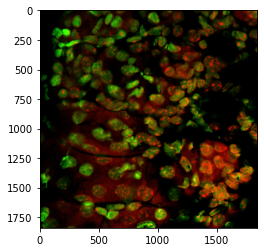

In [6]:
plt.imshow(img_lst[31])

In [7]:
#Step 1
for (n,i) in enumerate(img_lst):
    b,g,r = cv.split(i)
    _,b_mask = cv.threshold(b,30,255,cv.THRESH_TOZERO)
    _,g_mask = cv.threshold(g,30,255,cv.THRESH_TOZERO)
    _,r_mask = cv.threshold(r,30,255,cv.THRESH_TOZERO)
    b_new = cv.bitwise_and(b,b,mask=b_mask)
    g_new = cv.bitwise_and(g,g,mask=g_mask)
    r_new = cv.bitwise_and(r,r,mask=r_mask)
    new = cv.merge([b_new,g_new,r_new])
    img_lst[n] = new

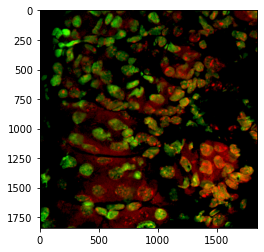

In [8]:
plt.imshow(img_lst[31])

In [12]:
#Step 2
green_low_h = int(128/2)
green_high_h = int(160/2)
green_low_s = int(0/100*255)
green_high_s = int(100/100*255)
green_low_v = int(0/100*255)
green_high_v = int(100/100*255)

low_green = np.array([green_low_h,green_low_s,green_low_v])
high_green = np.array([green_high_h,green_high_s,green_high_v])

blue_low_h = int(190/2)
blue_high_h = int(240/2)
blue_low_s = int(0/100*255)
blue_high_s = int(100/100*255)
blue_low_v = int(0/100*255)
blue_high_v = int(100/100*255)

low_blue = np.array([blue_low_h,blue_low_s,blue_low_v])
high_blue = np.array([blue_high_h,blue_high_s,blue_high_v])

green_masks = []
blue_masks = []
full_masks = []
for (i,img) in enumerate(img_lst):
    img_hsv = bgr2hsv(img)
    
    blue_mask = cv.inRange(img_hsv,low_blue,high_blue)
    green_mask = cv.inRange(img_hsv,low_green,high_green)
    
    green_masks.append(green_mask)
    blue_masks.append(blue_mask)
    full_masks.append(cv.bitwise_or(green_mask,blue_mask))
    
    
    cv.imwrite("/home/devesh/cell-segmentation/blue_masks/"+img_names[i],blue_mask)
    cv.imwrite("/home/devesh/cell-segmentation/green_masks/"+img_names[i],green_mask)
    cv.imwrite("/home/devesh/cell-segmentation/full_masks/"+img_names[i],green_mask)
    

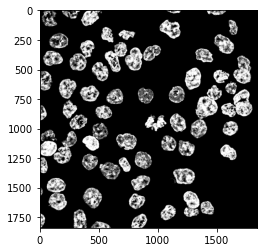

In [19]:
plt.imshow(full_masks[21],cmap="gray")

In [25]:
#Step 3
dilated_imgs = []
kernel_matrix = np.ones((5,5),np.uint8)
iterations = 2
for (i,img) in enumerate(full_masks):
    dilated_imgs.append(dilate(img,kernel_matrix,iterations))

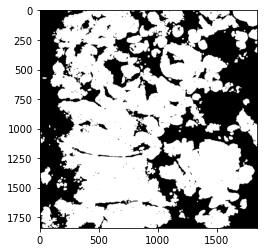

In [27]:
plt.imshow(dilated_imgs[31],cmap="gray")